In [1]:
"""
任意の境界条件を設定
あちあちLi=100濃度活物質(球体)をから少しずつLiが抜ける。
t_listを作成してGraph化しやすくする
"""

'\n任意の境界条件を設定\nあちあちLi=100濃度活物質(球体)をから少しずつLiが抜ける。\nt_listを作成してGraph化しやすくする\n'

固体内拡散に関するPDE/Govenig equation
\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial C_s(r, t)}{\partial r}\right) \\
  \frac{\partial C_s(r, t)}{\partial t} = D_s\left(\frac{2}{r}\frac{\partial C_s(r, t)}{\partial r}+\frac{\partial^2 C_s(r, t)}{\partial r^2}\right)
\end{equation*}

境界条件
\begin{equation*}
\frac{\partial C_s}{\partial r} \vert _{r=r_i} = 0 \\
- D_s\frac{\partial C_s}{\partial r} \vert _{r=r_0} = \frac{J_{Li}}{a_sF} \\
\end{equation*}

about J_Li
\begin{equation*}
J_{Li} = \frac{I}{A}.....\tt{(constant)}
\end{equation*}

In [24]:
import numpy as np

In [23]:
#定数
kappa = 1.1e-8         # [m2/s]拡散係数
C_init = 100.0       # [C]初期肉温度
rmax = 2 * 0.01   # half-diameter [m]　肉の厚さ 
a_factor = 2        # 0 for slab, 1 for cylinder, 2 for sphere

tmax = 400.0 * 1.5 * (rmax / 0.005) ** 2 #肉を焼く時間(sec) →たぶんrmaxに対して発散しないように設定
delta_t = 0.1 * (rmax / 0.005) ** 2 #1間隔の時間(sec)　→たぶんrmaxに対して発散しないように設定
delta_r = rmax / 25.0 #rのgrid分割　25分割
nr = int(rmax / delta_r) #rのgrid数
nstep = int(tmax / delta_t) #tのgrid数

J_Li = 0.01
#plot_intvl = 200　

In [11]:
#グリッド作成
r = np.linspace(0, rmax, nr, endpoint=True) - delta_r / 2 #中心点にしているのだと思われ。
dCdt = np.empty((nr,))
C_s = np.full((nr,), C_init)
t = np.linspace(0, tmax, nstep, endpoint=True) #t_list

In [5]:
#[C]初期境界条件
C_boundary = 100 
C_s[-1] = C_boundary  # outer boundary condition
dCdt[-1] = 0.0     # outer boundary condition (constant)

\begin{equation*}
\frac{d^2C_s}{dr^2} = \frac{C_s(r+\Delta r) - 2C_s(r) + C_s(r-\Delta r)}{\Delta r^2}\\
\frac{dC_s}{dr} = \frac{C_s(r+\Delta r) - C_s(r-\Delta r)}{2\Delta r}
\end{equation*}
を使って離散化

\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = D_s\left(\frac{2}{r}\frac{\partial C_s(r, t)}{\partial r}+\frac{\partial^2 C_s(r, t)}{\partial r^2}\right)
\end{equation*}

                                                　↓

\begin{equation*}
　\frac{\partial C_s(r, t)}{\partial t} 
 =　D_s\left( \frac{2}{r} \frac{C_s(r+\Delta r) - C_s(r-\Delta r)}{2\Delta r} 
       +\frac{C_s(r+\Delta r) - 2C_s(r) + C_s(r-\Delta r)}{\Delta r^2}\right)
\end{equation*}


In [22]:
#微分方程式の定義
def time_derivative(C_s):
    dCdt[1:-1] = kappa * \
        ((C_s[2:] - 2.0 * C_s[1:-1] + C_s[0:-2]) / (delta_r * delta_r) \
         + a_factor / r[1:-1] * (C_s[2:] - C_s[0:-2]) / (2 * delta_r))
    dCdt[0] = dCdt[1]  # inner boundary condition temperature[0] = temperature[1]
    return dCdt

In [13]:
#実行部分
C_list = C_s
for i in range(nstep):
    #境界条件
    C_boundary = C_init - J_Li*i*delta_t #一定時間で表面の温度を下げる
    C_s[-1] = C_boundary #一定時間で表面の温度を下げる
    #if (i % plot_intvl == 0):
    #    plot_snap(temperature, i)
    #np.append(dtdt, time_derivative(temperature), axis=0)
    dCdt = time_derivative(C_s)
    C_s[:] = C_s[:] + delta_t * dCdt[:]
    C_list = np.append(C_list, C_s,).reshape(i+2,nr)
    #temperature_all = np.append(temperature_all, temperature, axis=0)
    #temperature_all[i] = temperature_all.append(temperature:])

type(fig): <class 'matplotlib.figure.Figure'>


C:\Users\ayana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


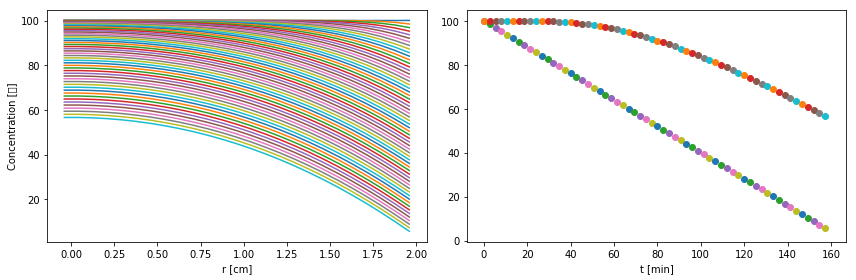

In [21]:
#graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4)) 
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax3 = fig.add_subplot(122)

#3 データを渡してプロット
Ngraph = 100
for i in range(int(nstep/Ngraph)):
    ax1.plot(r*100, C_list[Ngraph*i], label='')
for i in range(int(nstep/Ngraph)):
    ax2.scatter(i/(nstep/Ngraph)*tmax/60, C_list[Ngraph*i][-1], label='')
    ax3.scatter(i/(nstep/Ngraph)*tmax/60, C_list[Ngraph*i][0], label='')

ax1.set_xlabel("r [cm]")
ax1.set_ylabel("Concentration [％]")
ax2.set_xlabel("t [min]")
ax1.set_ylabel("Concentration [％]")

#ax1.legend()

fig.tight_layout() #かぶり

plt.show()
#ax2.plot(x, trajectories)

In [18]:
400.0 * 1.5 * (rmax / 0.005) ** 2 /60

160.0

In [19]:
0.1 * (rmax / 0.005) ** 2

1.6

In [20]:
int(tmax / delta_t)

6000